# FCM (Fuzzy C Means) Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dateset

In [3]:
n_samples = 1000
X = np.concatenate((
    np.random.normal((2,2), size = (n_samples, 2)),
    np.random.normal((-2,2), size = (n_samples, 2)),
    np.random.normal((9,0), size = (n_samples, 2)),
    np.random.normal((5,-8), size = (n_samples, 2))
))

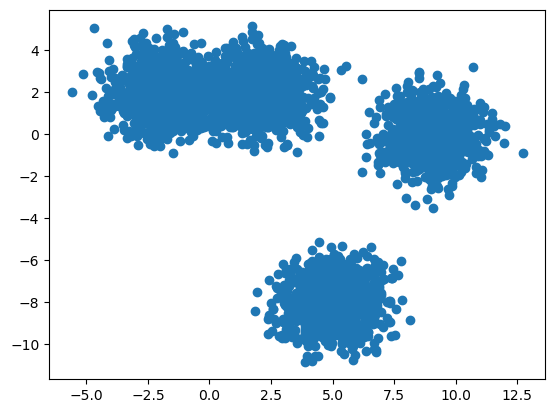

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# FCM Clustering

In [20]:
# pip install fuzzy-c-means
from fcmeans import FCM

In [21]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

In [22]:
fcm_centers = fcm.centers
fcm_centers

array([[-0.29117784,  2.02227035],
       [ 8.83179189,  0.02770494],
       [ 4.97122295, -8.00329049]])

In [23]:
fcm_labels = fcm.predict(X)
fcm_labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

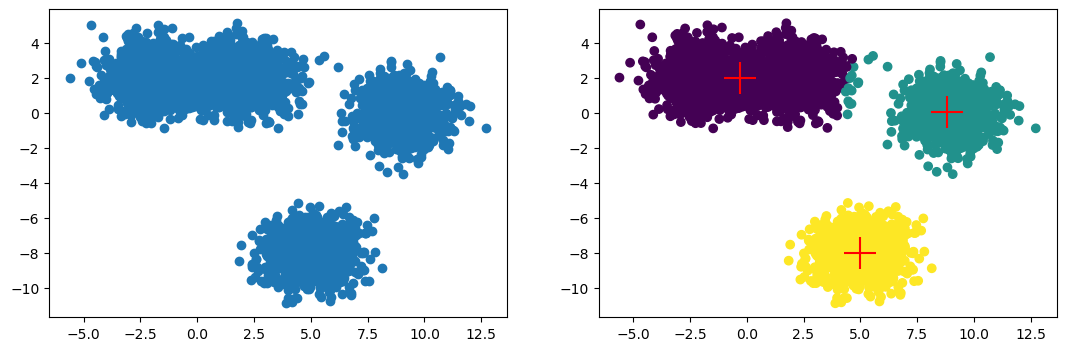

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1], c=fcm_labels)
axes[1].scatter(fcm_centers[:, 0], fcm_centers[:, 1], s=500, marker='+', color='red')


# Find best number of clusters

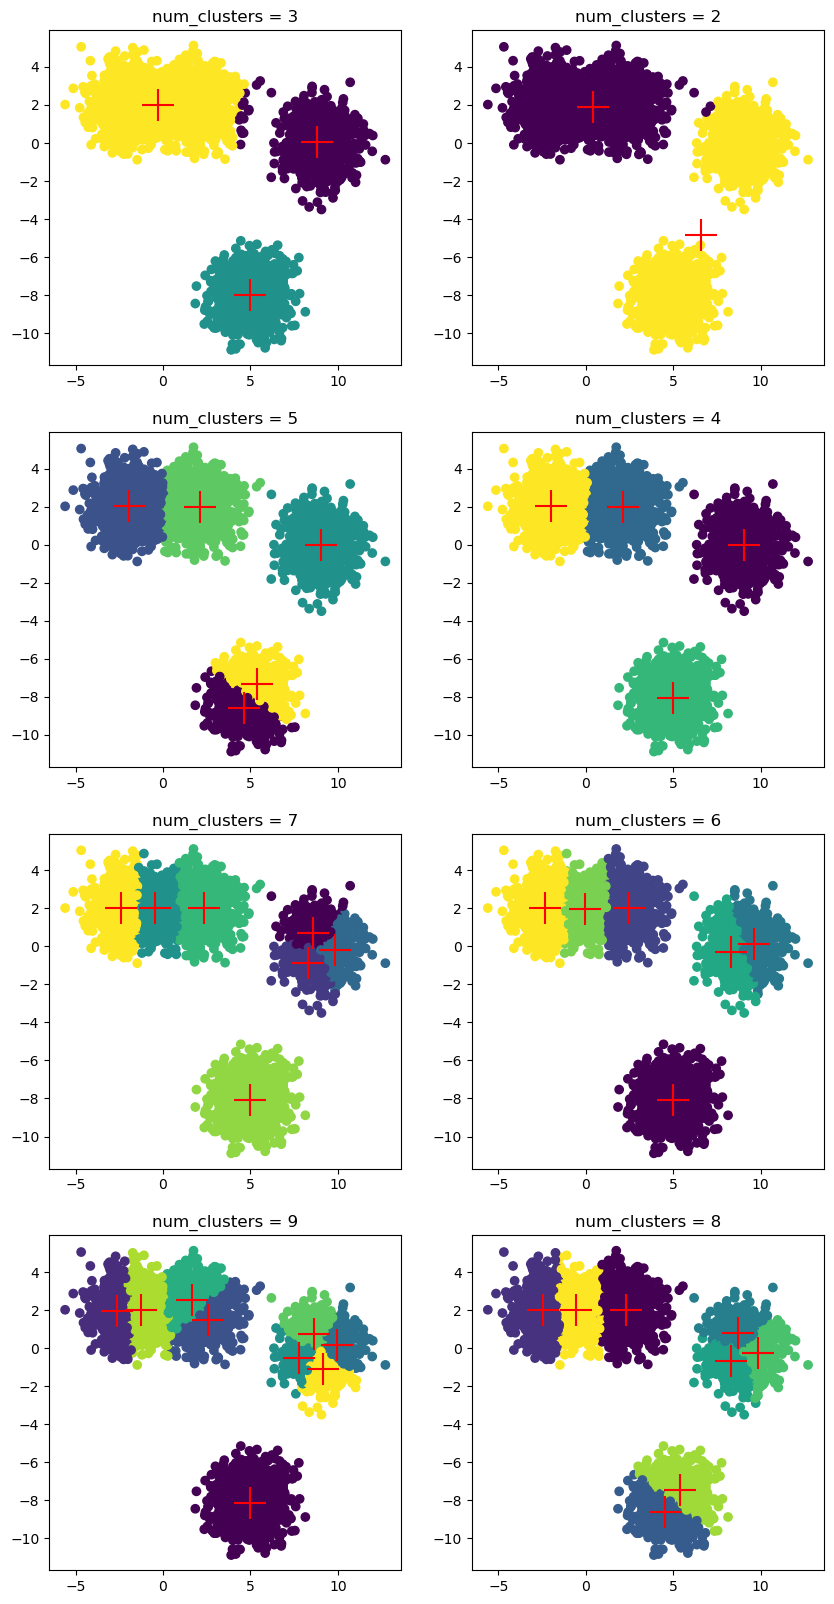

In [36]:
partition_coefficients = []
partition_entropy_coefficients = []
num_clusters = [x for x in range(2, 10, 1)]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))


for n in num_clusters:
    fcm = FCM(n_clusters=n)
    fcm.fit(X)
    fcm_centers = fcm.centers
    fcm_labels = fcm.predict(X)
    
    partition_coefficients.append(fcm.partition_coefficient)
    partition_entropy_coefficients.append(fcm.partition_entropy_coefficient)
        
    axes[(n)//2-1][(n-1)%2].scatter(X[:, 0], X[:, 1], c=fcm_labels)
    axes[(n)//2-1][(n-1)%2].scatter(fcm_centers[:, 0], fcm_centers[:, 1], s=500, marker='+', color='red')
    axes[(n)//2-1][(n-1)%2].set_title(f'num_clusters = {n}')
    

In [28]:
partition_coefficients

[0.4001239082082635,
 0.2871035423558853,
 0.20899450170002457,
 0.15011546354310598,
 0.11286305248192662,
 0.08774321459797703,
 0.07561496453715394,
 0.0646721495778768]

In [29]:
partition_entropy_coefficients

[0.24024678347175762,
 0.1380509758408064,
 0.12522324343542543,
 0.14793534516867798,
 0.15487601727038042,
 0.15447369325932916,
 0.1467769203732319,
 0.14377650953382073]

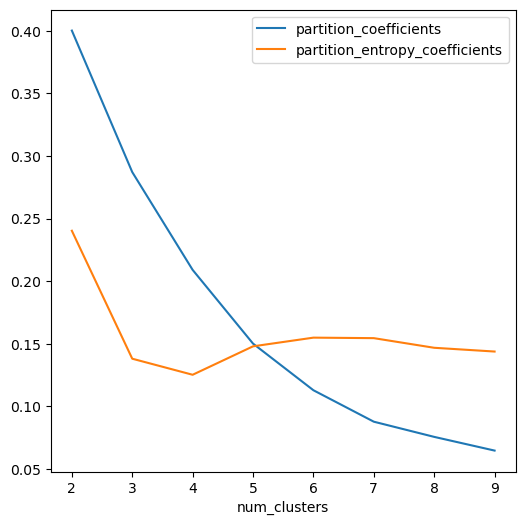

In [32]:
plt.figure(figsize=(6,6))
plt.plot(num_clusters, partition_coefficients)
plt.plot(num_clusters, partition_entropy_coefficients)
plt.xlabel("num_clusters")
plt.legend(["partition_coefficients", "partition_entropy_coefficients"])


 As you see in num_clusters = 4 we have mininimum PEC 